<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 13
#### Benjamín Ithurburu

## Introducción
En este notebook se resolverán los ejercicios 1) y 2) de la TS13.

Primero, se diseñará un filtro pasa-bajos Bessel de tercer orden mediante la síntesis del cuadripolo correspondiente, doblemente cargado, utilizando la configuración en forma de escalera. A continuación, se llevarán a cabo simulaciones de las magnitudes S21 y S11 para verificar y analizar los resultados obtenidos.

Posteriormente, se realizará un breve trabajo de investigación sobre el Nano VNA (Vector Network Analyzer), un instrumento clave para la medición y análisis del cuadripolo diseñado.

## #1 Filtro basa-bajos Bessel de tercer orden

In [1]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 13.pdf", width=1000, height=1000)

## Simulación Python
A continuación se procede a instanciar funciones y configurar el entorno del notebook para su posterior uso en las simulaciones.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# módulo de análisis simbólico
from sympy import *
init_printing(use_unicode=True)
import sympy as sp
from scipy.signal import TransferFunction
# variable de Laplace
from sympy.abc import s
from IPython.display import display, Math, Markdown

from pytc2.remociones import remover_polo_jw, remover_polo_infinito, remover_polo_dc
from pytc2.dibujar import display, dibujar_foster_derivacion, dibujar_cauer_LC, dibujar_tanque_derivacion, dibujar_puerto_entrada, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor, Capacitor, Inductor, dibujar_elemento_derivacion, Drawing
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.sistemas_lineales import bodePlot

# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 14
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías

### Ejercicio 1

#### Verificación de S21 normalizado con valores obtenidos en síntesis:

<IPython.core.display.Math object>

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

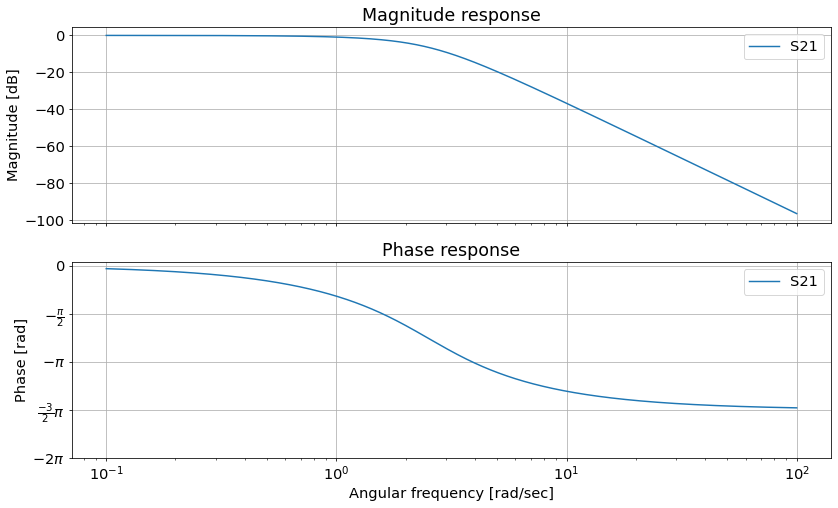

In [3]:
s = sp.symbols('s', complex=True)
Z1, Z2, Z3, Rg, Rl, L1, C2, L3 = sp.symbols("Z1, Z2, Z3, Rg, Rl, L1, C2, L3")

Z1 = s*L1
Z2 = 1/(s*C2)
Z3 = s*L3

Ta = Matrix([[1, Rg], [0, 1]])
Tb = Matrix([[(Z1+Z2)/Z2, (Z1*Z3 + Z1*Z2 + Z2*Z3)/Z2], [1/Z2, (Z3+Z2)/Z2]])
Tc = Matrix([[1, 0], [1/Rl, 1]])
T = Ta * Tb * Tc

A = T[0,0]
inverse_A = 2 * A**-1
# Expandir, simplificar y coleccionar términos
expanded_expr = expand(inverse_A)
simplified_expr = simplify(expanded_expr)
collected_expr = collect(simplified_expr, s)

# Agrupar términos en el numerador y denominador
num, denom = fraction(collected_expr)
num = collect(factor(num), s)
denom = collect(factor(denom), s)

# Mostrar el resultado en formato LaTeX
display(Math(r'S_{21} = 2\frac{V_2}{V_g} = \frac{' + latex(num) + '}{' + latex(denom)+'}'))

############################################################################################
Rg = 1
Rl = 1
L1 = 1.255
C2 = 0.553
L3 = 0.192

Z1 = s*L1
Z2 = 1/(s*C2)
Z3 = s*L3

Ta = Matrix([[1, Rg], [0, 1]])
Tb = Matrix([[(Z1+Z2)/Z2, (Z1*Z3 + Z1*Z2 + Z2*Z3)/Z2], [1/Z2, (Z3+Z2)/Z2]])
Tc = Matrix([[1, 0], [1/Rl, 1]])
T = Ta * Tb * Tc

A = T[0,0]
inverse_A = 2 * A**-1
num, den = sp.fraction(sp.simplify(sp.expand(sp.Mul(inverse_A, evaluate=False))))

num_coeffs = np.float64(sp.Poly(num,s).all_coeffs())
den_coeffs = np.float64(sp.Poly(den,s).all_coeffs())

# Obtención de función transferencia
my_tf = TransferFunction(num_coeffs,den_coeffs)

# Gráfico Bode
bodePlot(my_tf, fig_id=1, filter_description='S21')

#### Verificación de S21 desnormalizado con valores obtenidos en síntesis:

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

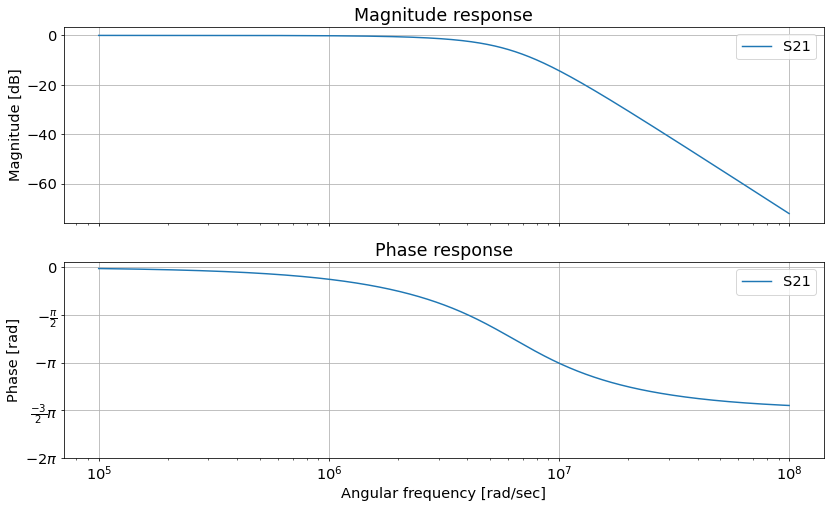

In [4]:
Rg = 50
Rl = 50
L1 = 24.629e-6
C2 = 4.341e-9
L3 = 3.768e-6

Z1 = s*L1
Z2 = 1/(s*C2)
Z3 = s*L3

Ta = Matrix([[1, Rg], [0, 1]])
Tb = Matrix([[(Z1+Z2)/Z2, (Z1*Z3 + Z1*Z2 + Z2*Z3)/Z2], [1/Z2, (Z3+Z2)/Z2]])
Tc = Matrix([[1, 0], [1/Rl, 1]])
T = Ta * Tb * Tc

A = T[0,0]
inverse_A = 2 * A**-1
num, den = sp.fraction(sp.simplify(sp.expand(sp.Mul(inverse_A, evaluate=False))))

num_coeffs = np.float64(sp.Poly(num,s).all_coeffs())
den_coeffs = np.float64(sp.Poly(den,s).all_coeffs())

# Obtención de función transferencia
my_tf = TransferFunction(num_coeffs,den_coeffs)

# Gráfico Bode
bodePlot(my_tf, fig_id=1, filter_description='S21')

## Simulación circuital

##### Esquemático circuito normalizado
<center><img src="./circuito_normalizado.png" width="1000"/></center>

##### $S{11}$ normalizado
<center><img src="./simulacion_s11_normalizado.png" width="1000"/></center>

##### $S{21}$ normalizado
<center><img src="./simulacion_s21_normalizado.png" width="1000"/></center>

* **Centro de la banda de paso: (f->0Hz)**
En esta región, S11 es bajo debido a que la mayor parte de la energía se transfiere al resistor de carga RL. Esto refleja un buen acoplamiento y baja reflexión en la entrada del filtro.
La respuesta en S21 (transmisión) tal como se puede ver en la sumulación, es plana y cercana a 0 dB, ya que los filtros Bessel priorizan la linealidad de fase y mantienen una respuesta suave en la banda de paso.
* **Frecuencia de corte: (-3dB)**
S11 comienza a aumentar porque la impedancia de entrada del cuadripolo ya no está bien adaptada a la fuente debido a la disminución de la transmisión hacia la carga. Esto genera un mayor nivel de reflexión.
En S21, la respuesta cae aproximadamente a −3dB, que es típica para determinar el ancho de banda de la banda de paso.
* **Transición y centro de la banda de stop:(f->ooHz)**
S11 sigue aumentando debido al rechazo de las frecuencias fuera de la banda de paso. Hasta alcanzar un máximo, lo que indica que casi toda la energía se refleja de vuelta a la fuente porque el filtro rechaza por completo estas frecuencias. Esto refleja que la energía no se transmite a la carga y es devuelta a la fuente. 
Por otra parte S21 decrece rápidamente en la zona de transición, debido al diseño de 3er orden que proporciona una pendiente moderada en el rechazo. Atenuando significativamente las altas frecuencias.


##### Esquemático circuito desnormalizado
<center><img src="./circuito_desnormalizado.png" width="1000"/></center>

##### $S{11}$ desnormalizado
<center><img src="./simulacion_s11_desnormalizado.png" width="1000"/></center>

##### $S{21}$ desnormalizado
<center><img src="./simulacion_s21_desnormalizado.png" width="1000"/></center>

## #2 Trabajo de Investigación sobre el NanoVNA (Vector Network Analyzer)

<center><img src="./NANO_VNA_V2.jpg" width="600"/></center>

## 1. Función Principal de un Vector Network Analyzer (VNA)

Un Vector Network Analyzer (VNA) es un instrumento esencial para la caracterización de redes eléctricas y electrónicas en frecuencias de radiofrecuencia (RF) y microondas. Su función principal es medir parámetros de dispersión $S$, los cuales describen cómo las señales se transmiten y reflejan en un sistema de interconexión o dispositivo bajo prueba (DUT).  

Los VNAs son herramientas indispensables para analizar componentes como filtros, amplificadores, antenas, líneas de transmisión y otros dispositivos de alta frecuencia. Con estas mediciones, se obtiene información crucial sobre:  

- **Pérdidas por inserción $S_{21}$:** Representa la cantidad de señal que pasa a través de un dispositivo.  
- **Reflexión $S_{11}$:** Indica cuánto de la señal es reflejada por el dispositivo.  

Un VNA es indispensable en diversas aplicaciones, como:  

- **Diseño de filtros y redes adaptadoras:** Para garantizar que cumplen con especificaciones de frecuencia y minimizan pérdidas.  
- **Caracterización de antenas:** Permite medir la adaptación de impedancia en frecuencias específicas y las propiedades de radiación.  
- **Verificación de conectores y cables:** Detecta desadaptaciones, pérdidas o fallas en líneas de transmisión.  
- **Desarrollo de amplificadores de RF:** Ayuda a analizar la estabilidad y respuesta en frecuencia.  

## 2. Comparación entre NanoVNA V2 y un DSO GW Instek GDS-1152A-U


| **Característica**       | **NanoVNA V2**                                                                                             | **GW Instek GDS-1152A-U**                                                                             |
|---------------------------|----------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| **Ancho de Banda**        | 50 kHz - 3 GHz                                                                                          | 150 MHz                                                                                              |
| **Rango Dinámico**        | 60 dB                  | 48.16dB                                                    |
| **Impedancia de Entrada** | 50 Ω                                                                                                    | 1 MΩ / 15 pF                                                                                         |
| **Funciones de Medición** | S11, S21 (coeficientes de reflexión y transmisión en el dominio de la frecuencia).                       | Señales temporales, FFT, funciones matemáticas básicas (suma, resta, multiplicación).                |
| **Precio Aproximado**     | Menor costo que osciloscopios tradicionales.                                                            | Generalmente más alto debido a sus capacidades y especificaciones más avanzadas.                    |


### Análisis:  

- **Ancho de banda:** El NanoVNA sobresale en análisis de frecuencias de RF y microondas, mientras que el DSO está diseñado para señales en el dominio del tiempo y suele tener una banda más limitada.  
- **Rango dinámico:** Este parámetro es relevante para VNAs, ya que determina la capacidad de medir señales débiles o con grandes diferencias de potencia. Los DSO no suelen especificar este rango.  
- **Impedancia de entrada:** Los VNAs tienen una impedancia fija de 50 Ω, crucial para aplicaciones RF, mientras que los DSO están diseñados para adaptarse a señales de baja frecuencia, con impedancias más altas.  


## 3. Medición en el Dominio del Tiempo  

Además de los parámetros de dispersión $ S{11}$ y $S_{21}$, algunos modelos de NanoVNA cuentan con funciones que permiten realizar mediciones en el dominio del tiempo. Esto se logra mediante la Transformada Inversa de Fourier de los datos en el dominio de la frecuencia, lo que permite visualizar:  

- **Reflexiones a lo largo de una línea de transmisión:** Identificación de fallas o discontinuidades.  
- **Análisis de distancia a la falla:** Muy útil en sistemas de cables y antenas para localizar puntos de desadaptación o cortes.  
  